In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/silss/Downloads/cleaned.csv")


In [15]:
# Read the file
data = pd.read_csv("C:/Users/silss/Downloads/cleaned.csv")

# Merge class 0 and 1 into a single class (e.g., 0), and keep class 2 as is
data['Accident_severity'] = data['Accident_severity'].replace({0: 0, 1: 0, 2: 1})

# Split the dataset into features (X) and target (y)
X = data.drop('Accident_severity', axis=1)  # Features
y = data['Accident_severity']  # Target (Accident_severity column)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])



# Apply SMOTE for oversampling
smote = BorderlineSMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display resampled data description
print("\nResampled Training Set Description:")
print(f"Features Shape: {X_train_smote.shape}")
print(f"Target Counts:\n{y_train_smote.value_counts()}")


Resampled Training Set Description:
Features Shape: (14580, 14)
Target Counts:
Accident_severity
1    7290
0    7290
Name: count, dtype: int64


In [17]:
# Perform Linear Discriminant Analysis (LDA)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_smote, y_train_smote)
lda_predictions = lda_model.predict(X_test)

# Evaluate LDA
print("\nLDA Classification Report:")
print(classification_report(y_test, lda_predictions))

print("\nLDA Confusion Matrix:")
print(confusion_matrix(y_test, lda_predictions))

# Perform Quadratic Discriminant Analysis (QDA)
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_smote, y_train_smote)
qda_predictions = qda_model.predict(X_test)

# Evaluate QDA
print("\nQDA Classification Report:")
print(classification_report(y_test, qda_predictions))

print("\nQDA Confusion Matrix:")
print(confusion_matrix(y_test, qda_predictions))
lda_coefficients = np.abs(lda_model.coef_[0])
lda_top_features_indices = np.argsort(lda_coefficients)[-3:]  # Indices of top 3 features
lda_top_features = X_train.columns[lda_top_features_indices]
lda_top_values = lda_coefficients[lda_top_features_indices]

# Get the absolute values of the coefficients for QDA (use priors to calculate feature importance if necessary)
qda_means_diff = np.abs(qda_model.means_[1] - qda_model.means_[0])
qda_top_features_indices = np.argsort(qda_means_diff)[-3:]  # Indices of top 3 features
qda_top_features = X_train.columns[qda_top_features_indices]
qda_top_values = qda_means_diff[qda_top_features_indices]



LDA Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.46      0.23       570
           1       0.84      0.53      0.65      3125

    accuracy                           0.52      3695
   macro avg       0.50      0.50      0.44      3695
weighted avg       0.74      0.52      0.59      3695


LDA Confusion Matrix:
[[ 264  306]
 [1465 1660]]

QDA Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.56      0.24       570
           1       0.84      0.43      0.57      3125

    accuracy                           0.45      3695
   macro avg       0.50      0.50      0.40      3695
weighted avg       0.74      0.45      0.52      3695


QDA Confusion Matrix:
[[ 322  248]
 [1794 1331]]


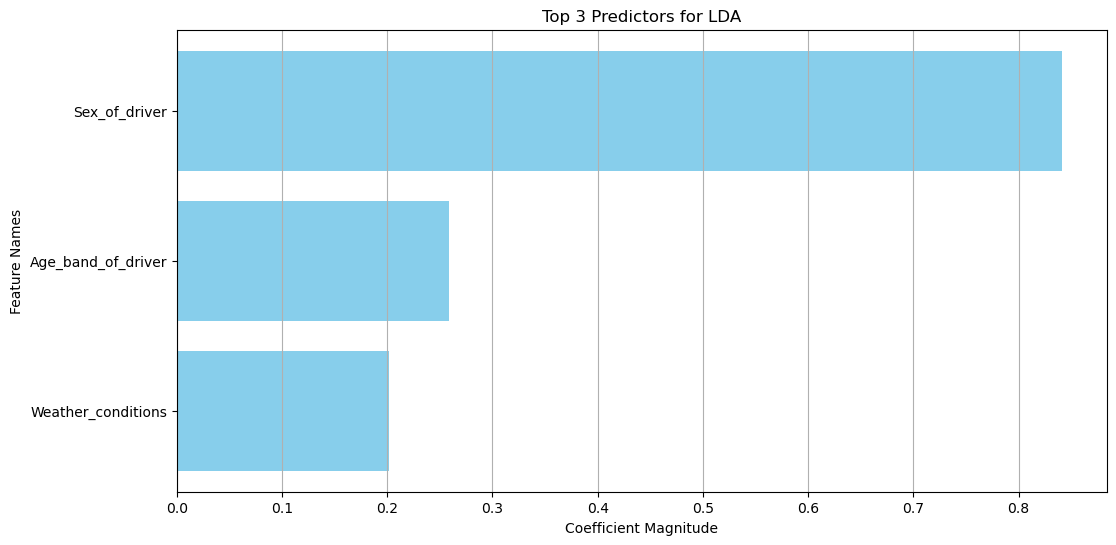

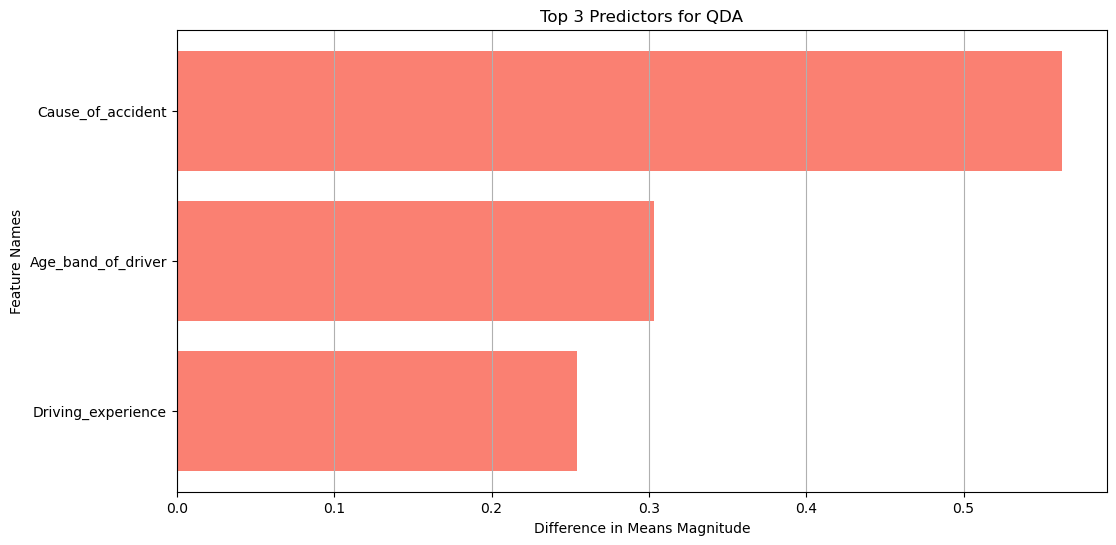

In [19]:
plt.figure(figsize=(12, 6))
plt.barh(lda_top_features, lda_top_values, color='skyblue')
plt.title('Top 3 Predictors for LDA')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature Names')
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(qda_top_features, qda_top_values, color='salmon')
plt.title('Top 3 Predictors for QDA')
plt.xlabel('Difference in Means Magnitude')
plt.ylabel('Feature Names')
plt.grid(axis='x')
plt.show()